<a href="https://colab.research.google.com/github/Nouha44/Exploratory-Data-Analysis-and-Clustering-of-Google-Play-Store-Apps/blob/main/projet_analyse_des_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Analyse des données de GOOGLE Play APP'S RATINGS***




In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("Analyse Des Données.xlsx",sheet_name=0,header=0,index_col=0)

In [ ]:
df.head()

,Category,Rating,Reviews,Size(M),Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2,500,Free,0.0,Everyone 10,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0,100,Free,0.0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.7,118,23,50,Free,0.0,Everyone,Art & Design,"July 7, 2018",1.1.3,4.1 and up
NOOK App for NOOK Devices,BOOKS_AND_REFERENCE,4.7,19080,Varies with device,500,Free,0.0,Everyone,Books & Reference,"April 25, 2018",Varies with device,Varies with device
Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7,10,Free,0.0,Everyone,Books & Reference,"July 13, 2018",1,2.3 and up



# **1. Nettoyage des données**





*  la fonction to_numeric : convertie toutes les valeurs de la colonne A en valeurs numériques. Toute chaîne de caractères qui ne peut pas être convertie en nombre sera remplacée par une valeur NaN.






In [ ]:
df.loc[:, 'Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df.loc[:, 'Size(M)'] = pd.to_numeric(df['Size(M)'], errors='coerce')

<ipython-input-4-b4116e703d06>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Size(M)'] = pd.to_numeric(df['Size(M)'], errors='coerce')


In [ ]:
df.head()

,Category,Rating,Reviews,Size(M),Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Superheroes Wallpapers | 4K Backgrounds,ART_AND_DESIGN,4.7,7699,4.2,500,Free,0.0,Everyone 10,Art & Design,"July 12, 2018",2.2.6.2,4.0.3 and up
Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0,100,Free,0.0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
HD Mickey Minnie Wallpapers,ART_AND_DESIGN,4.7,118,23.0,50,Free,0.0,Everyone,Art & Design,"July 7, 2018",1.1.3,4.1 and up
NOOK App for NOOK Devices,BOOKS_AND_REFERENCE,4.7,19080,NaN,500,Free,0.0,Everyone,Books & Reference,"April 25, 2018",Varies with device,Varies with device
Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7,10,Free,0.0,Everyone,Books & Reference,"July 13, 2018",1,2.3 and up






> description des données








In [ ]:
df.shape

(328, 12)

In [ ]:
df.describe()

,Rating,Reviews,Size(M),Installs,Price ($)
count,300.000000,3.280000e+02,230.000000,3.280000e+02,328.000000
mean,4.311333,2.294806e+06,26.822357,5.434456e+07,0.366860
std,0.429908,8.409078e+06,26.284434,1.702959e+08,2.183282
min,2.600000,0.000000e+00,0.018000,1.000000e+00,0.000000
25%,4.100000,3.550500e+03,6.625000,5.000000e+02,0.000000
50%,4.300000,6.075450e+04,17.500000,5.000000e+06,0.000000
75%,4.500000,7.118668e+05,37.000000,1.000000e+07,0.000000
max,9.000000,6.911932e+07,99.000000,1.000000e+09,29.990000


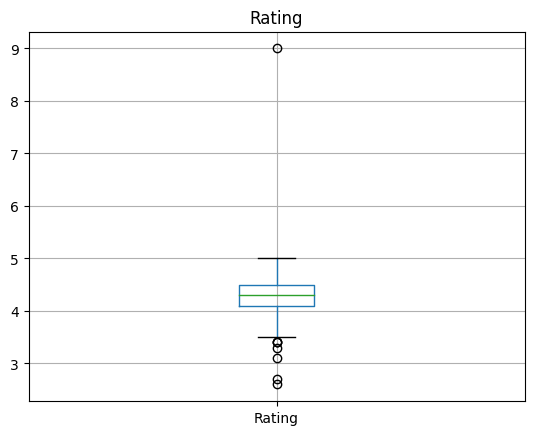

In [ ]:
df[['Rating']].boxplot()
plt.title('Rating')
plt.show()


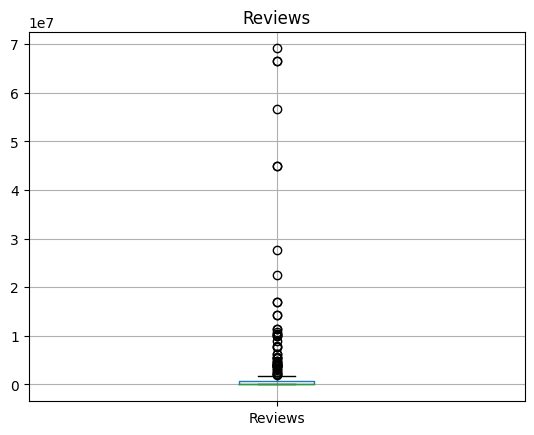

In [ ]:
df[['Reviews']].boxplot()
plt.title('Reviews')
plt.show()

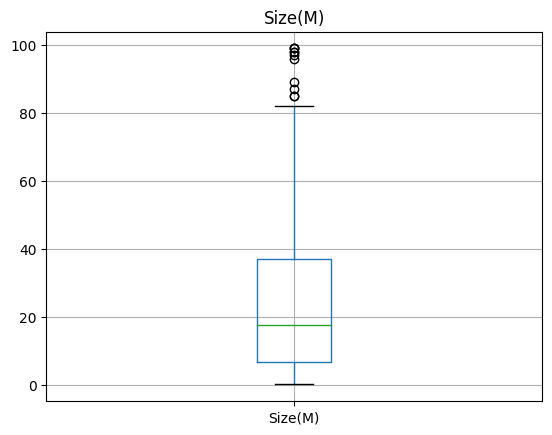

In [ ]:
df[['Size(M)']].boxplot()
plt.title('Size(M)')
plt.show()

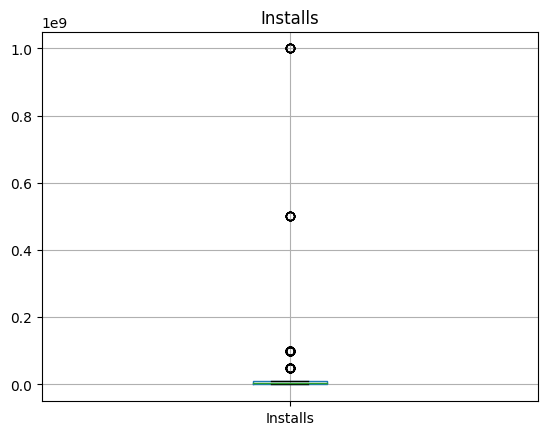

In [ ]:
df[['Installs']].boxplot()
plt.title('Installs')
plt.show()

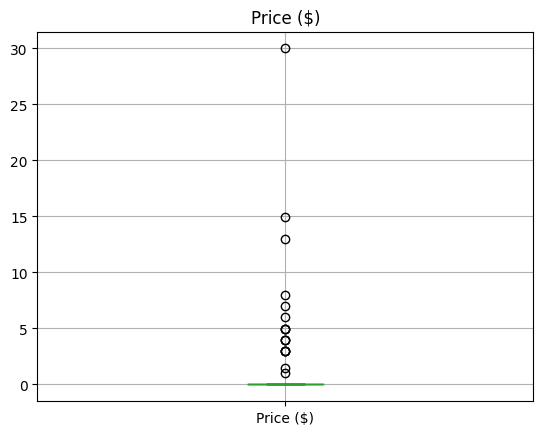

In [ ]:
df[['Price ($)']].boxplot()
plt.title('Price ($)')
plt.show()

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Reviews'}>],
       [<Axes: title={'center': 'Size(M)'}>,
        <Axes: title={'center': 'Installs'}>],
       [<Axes: title={'center': 'Price ($)'}>, <Axes: >]], dtype=object)

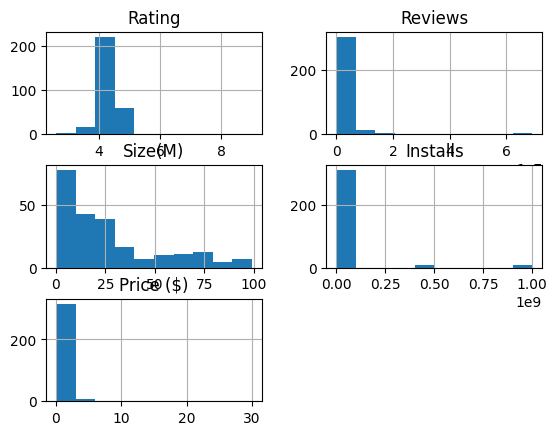

In [ ]:
df.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, Superheroes Wallpapers | 4K Backgrounds to Jaumo Dating, Flirt & Live Video
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        328 non-null    object 
 1   Rating          300 non-null    float64
 2   Reviews         328 non-null    int64  
 3   Size(M)         230 non-null    float64
 4   Installs        328 non-null    int64  
 5   Type            328 non-null    object 
 6   Price ($)       328 non-null    float64
 7   Content Rating  328 non-null    object 
 8   Genres          328 non-null    object 
 9   Last Updated    328 non-null    object 
 10  Current Ver     326 non-null    object 
 11  Android Ver     326 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 33.3+ KB


In [ ]:
df.isnull().sum()

Category           0
Rating            28
Reviews            0
Size(M)           98
Installs           0
Type               0
Price ($)          0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        2
Android Ver        2
dtype: int64

In [ ]:
condition=df[df.Rating>5]

In [ ]:
df = df.drop(condition.index)

In [ ]:
df.shape

(326, 12)

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Reviews'}>],
       [<Axes: title={'center': 'Size(M)'}>,
        <Axes: title={'center': 'Installs'}>],
       [<Axes: title={'center': 'Price ($)'}>, <Axes: >]], dtype=object)

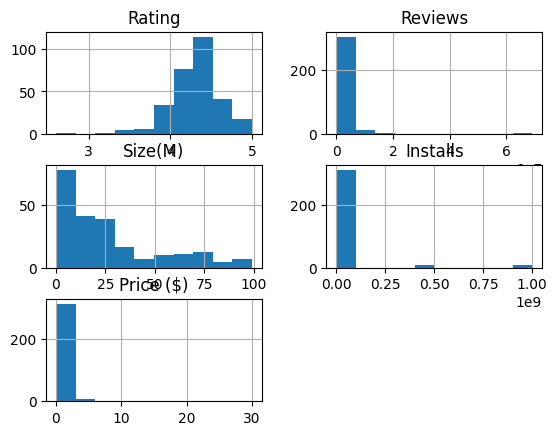

In [ ]:
df.hist()

Pour la variable "Rating" elle est pratiquement symetrique puisque median=mean

In [ ]:
df['Rating'].median()

4.3

In [ ]:
df['Rating'].mean()

4.295302013422819



```
# This is formatted as code
```

Pour la variable "Size(M)" elle est désequilibrée (skewed)
d'ou on travaille sur le median

In [ ]:
df['Size(M)'].median()

18.0

In [ ]:
df['Size(M)'].mean()

26.943605263157895



> On commence maintenant à remplir les données manquantes










1.   les variables quantitatives




In [ ]:
df.Rating=df['Rating'].fillna(df.Rating.median())
df['Size(M)']=df['Size(M)'].fillna(df['Size(M)'].median())

In [ ]:
df.isnull().sum()

Category          0
Rating            0
Reviews           0
Size(M)           0
Installs          0
Type              0
Price ($)         0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       2
Android Ver       2
dtype: int64


2.   les variables qualitatives



:

   *   Connaitre les catégories de chaque variable qualitative




In [ ]:
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())

0    Varies with device
Name: Current Ver, dtype: object
0    Varies with device
Name: Android Ver, dtype: object


In [ ]:
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]), inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]), inplace=True)

In [ ]:
df.isnull().sum()

Category          0
Rating            0
Reviews           0
Size(M)           0
Installs          0
Type              0
Price ($)         0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
categories = df['Category'].unique()
print(categories)

['ART_AND_DESIGN' 'BOOKS_AND_REFERENCE' 'BUSINESS' 'COMICS'
 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT' 'EVENTS' 'GAME'
 'MEDICAL' 'SOCIAL']


In [ ]:
categories = df['Content Rating'].unique()
print(categories)

['Everyone 10' 'Everyone' 'Teen' 'Mature 17']


In [ ]:
categories = df['Genres'].unique()
print(categories)

['Art & Design' 'Art & Design;Action & Adventure' 'Books & Reference'
 'Business' 'Comics' 'Communication' 'Dating' 'Education'
 'Education;Creativity' 'Education;Education' 'Education;Music & Video'
 'Entertainment' 'Events' 'Action' 'Puzzle' 'Arcade' 'Strategy' 'Casual'
 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Adventure;Action & Adventure' 'Medical'
 'Social']


In [ ]:
categories = df['Type'].unique()
print(categories)

['Free' 'Paid']


In [ ]:
categories = df['Last Updated'].unique()
print(categories)

['July 12, 2018' 'March 7, 2018' 'July 7, 2018' 'April 25, 2018'
 'July 13, 2018' 'June 25, 2018' 'July 4, 2018' 'June 29, 2018'
 'November 23, 2017' 'June 20, 2018' 'August 1, 2018' 'October 16, 2014'
 'July 11, 2018' 'July 31, 2018' 'August 28, 2017' 'March 31, 2018'
 'May 28, 2018' 'August 20, 2016' 'July 17, 2018' 'June 16, 2018'
 'May 1, 2018' 'June 15, 2018' 'July 28, 2018' 'July 19, 2018'
 'July 29, 2018' 'May 21, 2018' 'August 3, 2018' 'May 4, 2018'
 'April 2, 2018' 'July 24, 2018' 'August 2, 2018' 'June 14, 2018'
 'July 8, 2018' 'March 25, 2018' 'April 11, 2017' 'July 30, 2018'
 'June 26, 2018' 'July 10, 2017' 'February 2, 2015' 'July 5, 2018'
 'March 5, 2017' 'April 19, 2018' 'July 18, 2018' 'April 18, 2018'
 'January 5, 2018' 'May 15, 2018' 'July 25, 2018' 'July 26, 2018'
 'December 4, 2017' 'June 22, 2018' 'May 24, 2018' 'January 24, 2018'
 'June 7, 2016' 'January 6, 2018' 'April 3, 2018' 'July 6, 2014'
 'June 21, 2018' 'August 9, 2017' 'July 21, 2018' 'June 8, 2018'
 'Sept

In [ ]:
categories = df['Current Ver'].unique()
print(categories)

['2.2.6.2' '1.0.0' '1.1.3' 'Varies with device' 1 '5.0.6' '1.2.3' 3.12 2
 1.28 '6.0.8' '1.0.3' 1.9 '9.00.950462' 14 6 3.05 1.5 3 '2.5.3' '7.0.4.6'
 1.15 '3.4.2' '2.19.0.204537701' '9.7.14188' '4.9.10' '5.2.8' 3.3 '1.5.2'
 '3.4.6' 1.3 '4.2.0.2' 1.01 '2.3.3' 1.4 '4.5.1' '7.5.3.20547' '5.85.1' 196
 '3.0.4' '3.0.7' '1.26.001' '3.5.0' '8.1.2-6310' 5.86 '5.1.2-6310'
 '2018.1.715' '3.9.7' 1.286 '6.19.1' '2.17.3' '2.2.245' '4.5.4' '5.28.0'
 '5.29.3' 5.403 '1.9.4.74' '5.0.9' '9.8.376' 2.8 2.3 '3.2.0' '2.3.17'
 '9.8.000000010501' '7.3(800241)' '2.9.8' '7.2.29' '2.6.139' '1.1.6'
 '1.0.1' 1.2 '11.10.1' '2.5.2' '6.1.3' '4.17.2' '3.5.0.1' '2.6.141'
 '4.19.0.2320' '6.6.5' 1.639 '1.6.1' '2.5.1' '1.9.7' '4.4B' '2.4.1'
 '5.0.1' 2.45 '4.5.5' '1.0.4' '1.2.1' '4.0.18' '1.6.5' 4.2 8.2 '2.2.9'
 '1.94.9' '1.2.8' '1.3.8' '2.1.8' '2.3.7' '2.9.0' '2.16.11.10' 2.17
 '7.5.0' 8.0626 '4.003.1' '3.1.4' '11.45.0' '2018.07.31229' '4.0.19'
 '11.1.1' 1.1 1.75 '2.0.1' 1.107 '16.11.8' '1.0.6' 2.9 '2.6.9' '2.2.00'
 '3.8.5.G

In [ ]:
categories = df['Android Ver'].unique()
print(categories)

['4.0.3 and up' '4.1 and up' 'Varies with device' '2.3 and up'
 '4.0 and up' '3.0 and up' '2.1 and up' '4.4 and up' '7.0 and up'
 '6.0 and up' '4.2 and up' '5.0 and up' '2.0 and up' '2.2 and up'
 '2.3.3 and up' '4.3 and up' '4.4W and up' '5.1 and up']


In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_copy.Category=le.fit_transform(df_copy.Category)

In [ ]:
df_copy['Type']=le.fit_transform(df_copy['Type'])

In [ ]:
df_copy['Content Rating']=le.fit_transform(df_copy['Content Rating'])

In [ ]:
df_copy['Genres']=le.fit_transform(df_copy['Genres'])

In [ ]:
df_copy['Last Updated']=le.fit_transform(df_copy['Last Updated'])

In [ ]:
df_copy

,Category,Rating,Reviews,Size(M),Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Superheroes Wallpapers | 4K Backgrounds,0,4.7,7699,4.2,500,0,0.0,1,3,39,2.2.6.2,4.0.3 and up
Mcqueen Coloring pages,0,4.3,61,7.0,100,0,0.0,0,4,94,1.0.0,4.1 and up
HD Mickey Minnie Wallpapers,0,4.7,118,23.0,50,0,0.0,0,3,67,1.1.3,4.1 and up
NOOK App for NOOK Devices,1,4.7,19080,18.0,500,0,0.0,0,5,6,Varies with device,Varies with device
Anonymous caller detection,1,4.3,161,2.7,10,0,0.0,0,5,40,1,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
MeetMe: Chat & Meet New People,11,4.2,1259894,76.0,50000000,0,0.0,2,23,15,Varies with device,4.1 and up
"Tagged - Meet, Chat & Dating",11,4.1,486830,18.0,10000000,0,0.0,2,23,76,Varies with device,Varies with device
LOVOO,11,4.0,852455,68.0,10000000,0,0.0,2,23,15,27,4.2 and up


In [ ]:
df_copy=df_copy.drop(['Current Ver','Category','Type','Content Rating','Genres','Last Updated','Android Ver'], axis=1)

In [ ]:
df_copy.describe()

,Rating,Reviews,Size(M),Installs,Price ($)
count,326.000000,3.260000e+02,326.000000,3.260000e+02,326.000000
mean,4.295706,2.303363e+06,24.255037,5.461662e+07,0.369110
std,0.319586,8.434198e+06,22.416098,1.707835e+08,2.189799
min,2.600000,0.000000e+00,0.018000,1.000000e+00,0.000000
25%,4.200000,3.459500e+03,11.000000,5.000000e+02,0.000000
50%,4.300000,6.005400e+04,18.000000,5.000000e+06,0.000000
75%,4.500000,6.831682e+05,26.000000,1.000000e+07,0.000000
max,5.000000,6.911932e+07,99.000000,1.000000e+09,29.990000


In [ ]:
print(df_copy)

                                         Rating  Reviews  Size(M)   Installs  \
App                                                                            
Superheroes Wallpapers | 4K Backgrounds     4.7     7699      4.2        500   
Mcqueen Coloring pages                      4.3       61      7.0        100   
HD Mickey Minnie Wallpapers                 4.7      118     23.0         50   
NOOK App for NOOK Devices                   4.7    19080     18.0        500   
Anonymous caller detection                  4.3      161      2.7         10   
...                                         ...      ...      ...        ...   
MeetMe: Chat & Meet New People              4.2  1259894     76.0   50000000   
Tagged - Meet, Chat & Dating                4.1   486830     18.0   10000000   
LOVOO                                       4.0   852455     68.0   10000000   
SKOUT - Meet, Chat, Go Live                 4.3  1064076     18.0   50000000   
Badoo - Free Chat & Dating App          

# **2 . LA Méthode PCA :**





In [ ]:
print(df_copy.describe(include='all'))

           Rating       Reviews     Size(M)      Installs   Price ($)
count  326.000000  3.260000e+02  326.000000  3.260000e+02  326.000000
mean     4.295706  2.303363e+06   24.255037  5.461662e+07    0.369110
std      0.319586  8.434198e+06   22.416098  1.707835e+08    2.189799
min      2.600000  0.000000e+00    0.018000  1.000000e+00    0.000000
25%      4.200000  3.459500e+03   11.000000  5.000000e+02    0.000000
50%      4.300000  6.005400e+04   18.000000  5.000000e+06    0.000000
75%      4.500000  6.831682e+05   26.000000  1.000000e+07    0.000000
max      5.000000  6.911932e+07   99.000000  1.000000e+09   29.990000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Z = sc.fit_transform(df_copy)
print(Z)

[[ 1.26700082 -0.27260363 -0.89604654 -0.32028902 -0.16881815]
 [ 0.01345828 -0.27351062 -0.77094429 -0.32029137 -0.16881815]
 [ 1.26700082 -0.27350385 -0.05607426 -0.32029166 -0.16881815]
 ...
 [-0.92669863 -0.17229123  1.95449768 -0.26164827 -0.16881815]
 [ 0.01345828 -0.14716183 -0.27947115 -0.02707354 -0.16881815]
 [ 0.01345828  0.17555668 -0.27947115  0.26614487 -0.16881815]]




*   La nouvelle DataFrame centrée réduite




In [ ]:
pd.DataFrame(Z,columns=df_copy.columns,index=df_copy.index)

,Rating,Reviews,Size(M),Installs,Price ($)
App,,,,,
Superheroes Wallpapers | 4K Backgrounds,1.267001,-0.272604,-0.896047,-0.320289,-0.168818
Mcqueen Coloring pages,0.013458,-0.273511,-0.770944,-0.320291,-0.168818
HD Mickey Minnie Wallpapers,1.267001,-0.273504,-0.056074,-0.320292,-0.168818
NOOK App for NOOK Devices,1.267001,-0.271252,-0.279471,-0.320289,-0.168818
Anonymous caller detection,0.013458,-0.273499,-0.963066,-0.320292,-0.168818
...,...,...,...,...,...
MeetMe: Chat & Meet New People,-0.299927,-0.123909,2.311933,-0.027074,-0.168818
"Tagged - Meet, Chat & Dating",-0.613313,-0.215708,-0.279471,-0.261648,-0.168818
LOVOO,-0.926699,-0.172291,1.954498,-0.261648,-0.168818




*   La matrice de corrélation




In [ ]:
corr=df_copy.corr()
print(corr)

             Rating   Reviews   Size(M)  Installs  Price ($)
Rating     1.000000  0.081353  0.134981  0.007276  -0.193701
Reviews    0.081353  1.000000  0.202623  0.740323  -0.046143
Size(M)    0.134981  0.202623  1.000000  0.093239  -0.077769
Installs   0.007276  0.740323  0.093239  1.000000  -0.054071
Price ($) -0.193701 -0.046143 -0.077769 -0.054071   1.000000




*   Calcul des valeurs propres, l'inetie expliquée par chaque axe factoriel et leur cumul






1.   valeurs propres




In [ ]:
eig_vals, eig_vecs = np.linalg.eig(corr)
eigval=np.sort(eig_vals)
valprop=eigval[::-1]
print('les valeurs propres sont:',valprop)
cumval=(np.cumsum(valprop))
print('les cummulation des valeurs propres sont:',cumval)

les valeurs propres sont: [1.8233319  1.22252643 0.9132757  0.79227368 0.2485923 ]
les cummulation des valeurs propres sont: [1.8233319  3.04585833 3.95913402 4.7514077  5.        ]




2.   inertie expliquée



In [ ]:
p = df_copy.shape[1]
inert=(valprop/p)*100
print('l inertie expliquée est',inert)
cuminert=(np.cumsum(valprop)/p)*100
print('le cummule de l''inertie expliquée est',cuminert)

l inertie expliquée est [36.4666379  24.45052863 18.26551395 15.84547358  4.97184594]
le cummule de linertie expliquée est [ 36.4666379   60.91716653  79.18268048  95.02815406 100.        ]


In [ ]:
print(pd.DataFrame({'valprop':valprop,'cumval':cumval,'inertie':inert,'inertiecum':cuminert, }))

    valprop    cumval    inertie  inertiecum
0  1.823332  1.823332  36.466638   36.466638
1  1.222526  3.045858  24.450529   60.917167
2  0.913276  3.959134  18.265514   79.182680
3  0.792274  4.751408  15.845474   95.028154
4  0.248592  5.000000   4.971846  100.000000




---
L'etude des individus



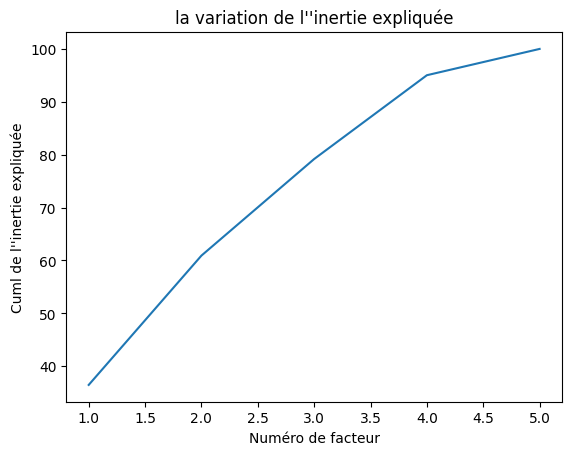

In [ ]:
plt.plot(np.arange(1,p+1),cuminert)
plt.title("la variation de l''inertie expliquée")
plt.ylabel("Cuml de l''inertie expliquée")
plt.xlabel("Numéro de facteur")
plt.show()




*   les coordonnées de chaque individu sur les différents axes factoriels.





In [ ]:
from sklearn.decomposition import PCA
acp = PCA()
print(acp)
coord = acp.fit_transform(Z)
print(coord)

PCA()
[[-0.42551818 -0.75212911 -0.79412453  1.11097674 -0.04382747]
 [-0.58145872  0.02855632 -0.65459028  0.1467447  -0.10722993]
 [-0.19239057 -1.04224991 -0.1029971   0.82391913  0.03969791]
 ...
 [ 0.14086917 -0.2621068   1.60010568 -1.4667263   0.07284818]
 [-0.16872438 -0.04485569 -0.30946245 -0.00374452  0.05397607]
 [ 0.23997083  0.08479218 -0.37708365  0.02743443  0.02678833]]


In [ ]:
column_names=['score Fact1','score Fact2','score Fact3','score Fact4','score Fact5']

In [ ]:
a=pd.DataFrame(coord,columns=column_names,index=df_copy.index)
a

,score Fact1,score Fact2,score Fact3,score Fact4,score Fact5
App,,,,,
Superheroes Wallpapers | 4K Backgrounds,-0.425518,-0.752129,-0.794125,1.110977,-0.043827
Mcqueen Coloring pages,-0.581459,0.028556,-0.654590,0.146745,-0.107230
HD Mickey Minnie Wallpapers,-0.192391,-1.042250,-0.102997,0.823919,0.039698
NOOK App for NOOK Devices,-0.253031,-0.964747,-0.286894,0.900405,0.016051
Anonymous caller detection,-0.634912,0.094880,-0.812659,0.212388,-0.126197
...,...,...,...,...,...
MeetMe: Chat & Meet New People,0.520563,-0.729473,1.830767,-1.117882,0.274024
"Tagged - Meet, Chat & Dating",-0.462584,0.295691,-0.245183,-0.476126,-0.097564
LOVOO,0.140869,-0.262107,1.600106,-1.466726,0.072848


In [ ]:
max_val = a['score Fact4'].idxmax()
max_val

'EMT PASS'


*   les contributions et les qualités des individus sur les axes factoriels





In [ ]:
n= df_copy.shape[0]
A=coord**2
Ctr1=(A[:,0]/(n*eig_vals[0]))*100
Ctr2=(A[:,1]/(n*eig_vals[1]))*100
Ctr3=(A[:,2]/(n*eig_vals[2]))*100
Ctr4=(A[:,3]/(n*eig_vals[2]))*100

In [ ]:
B=Z**2
normind=np.sum(Z**2,axis=1)
Cos1=(A[:,0]/normind)*100
Cos2=(A[:,1]/normind)*100
Cos3=(A[:,2]/normind)*100
Cos4=(A[:,3]/normind)*100

In [ ]:
print(pd.DataFrame({'ID':df_copy.index,'Contr_1':Ctr1,'Contr_2':Ctr2,'Contr_3':Ctr3,'Contr_4':Ctr4,'Coscar_1':Cos1,'Coscar_2':Cos2,'Coscar_3':Cos3,'Coscar_4':Cos4}))

                                          ID   Contr_1   Contr_2   Contr_3  \
0    Superheroes Wallpapers | 4K Backgrounds  0.030462  0.698039  0.158235   
1                     Mcqueen Coloring pages  0.056879  0.001006  0.107514   
2                HD Mickey Minnie Wallpapers  0.006227  1.340412  0.002662   
3                  NOOK App for NOOK Devices  0.010771  1.148476  0.020652   
4                 Anonymous caller detection  0.067818  0.011108  0.165707   
..                                       ...       ...       ...       ...   
321           MeetMe: Chat & Meet New People  0.045589  0.656619  0.840989   
322             Tagged - Meet, Chat & Dating  0.036000  0.107888  0.015084   
323                                    LOVOO  0.003338  0.084772  0.642424   
324              SKOUT - Meet, Chat, Go Live  0.004789  0.002483  0.024029   
325           Badoo - Free Chat & Dating App  0.009688  0.008872  0.035678   

      Contr_4   Coscar_1   Coscar_2   Coscar_3   Coscar_4  
0  

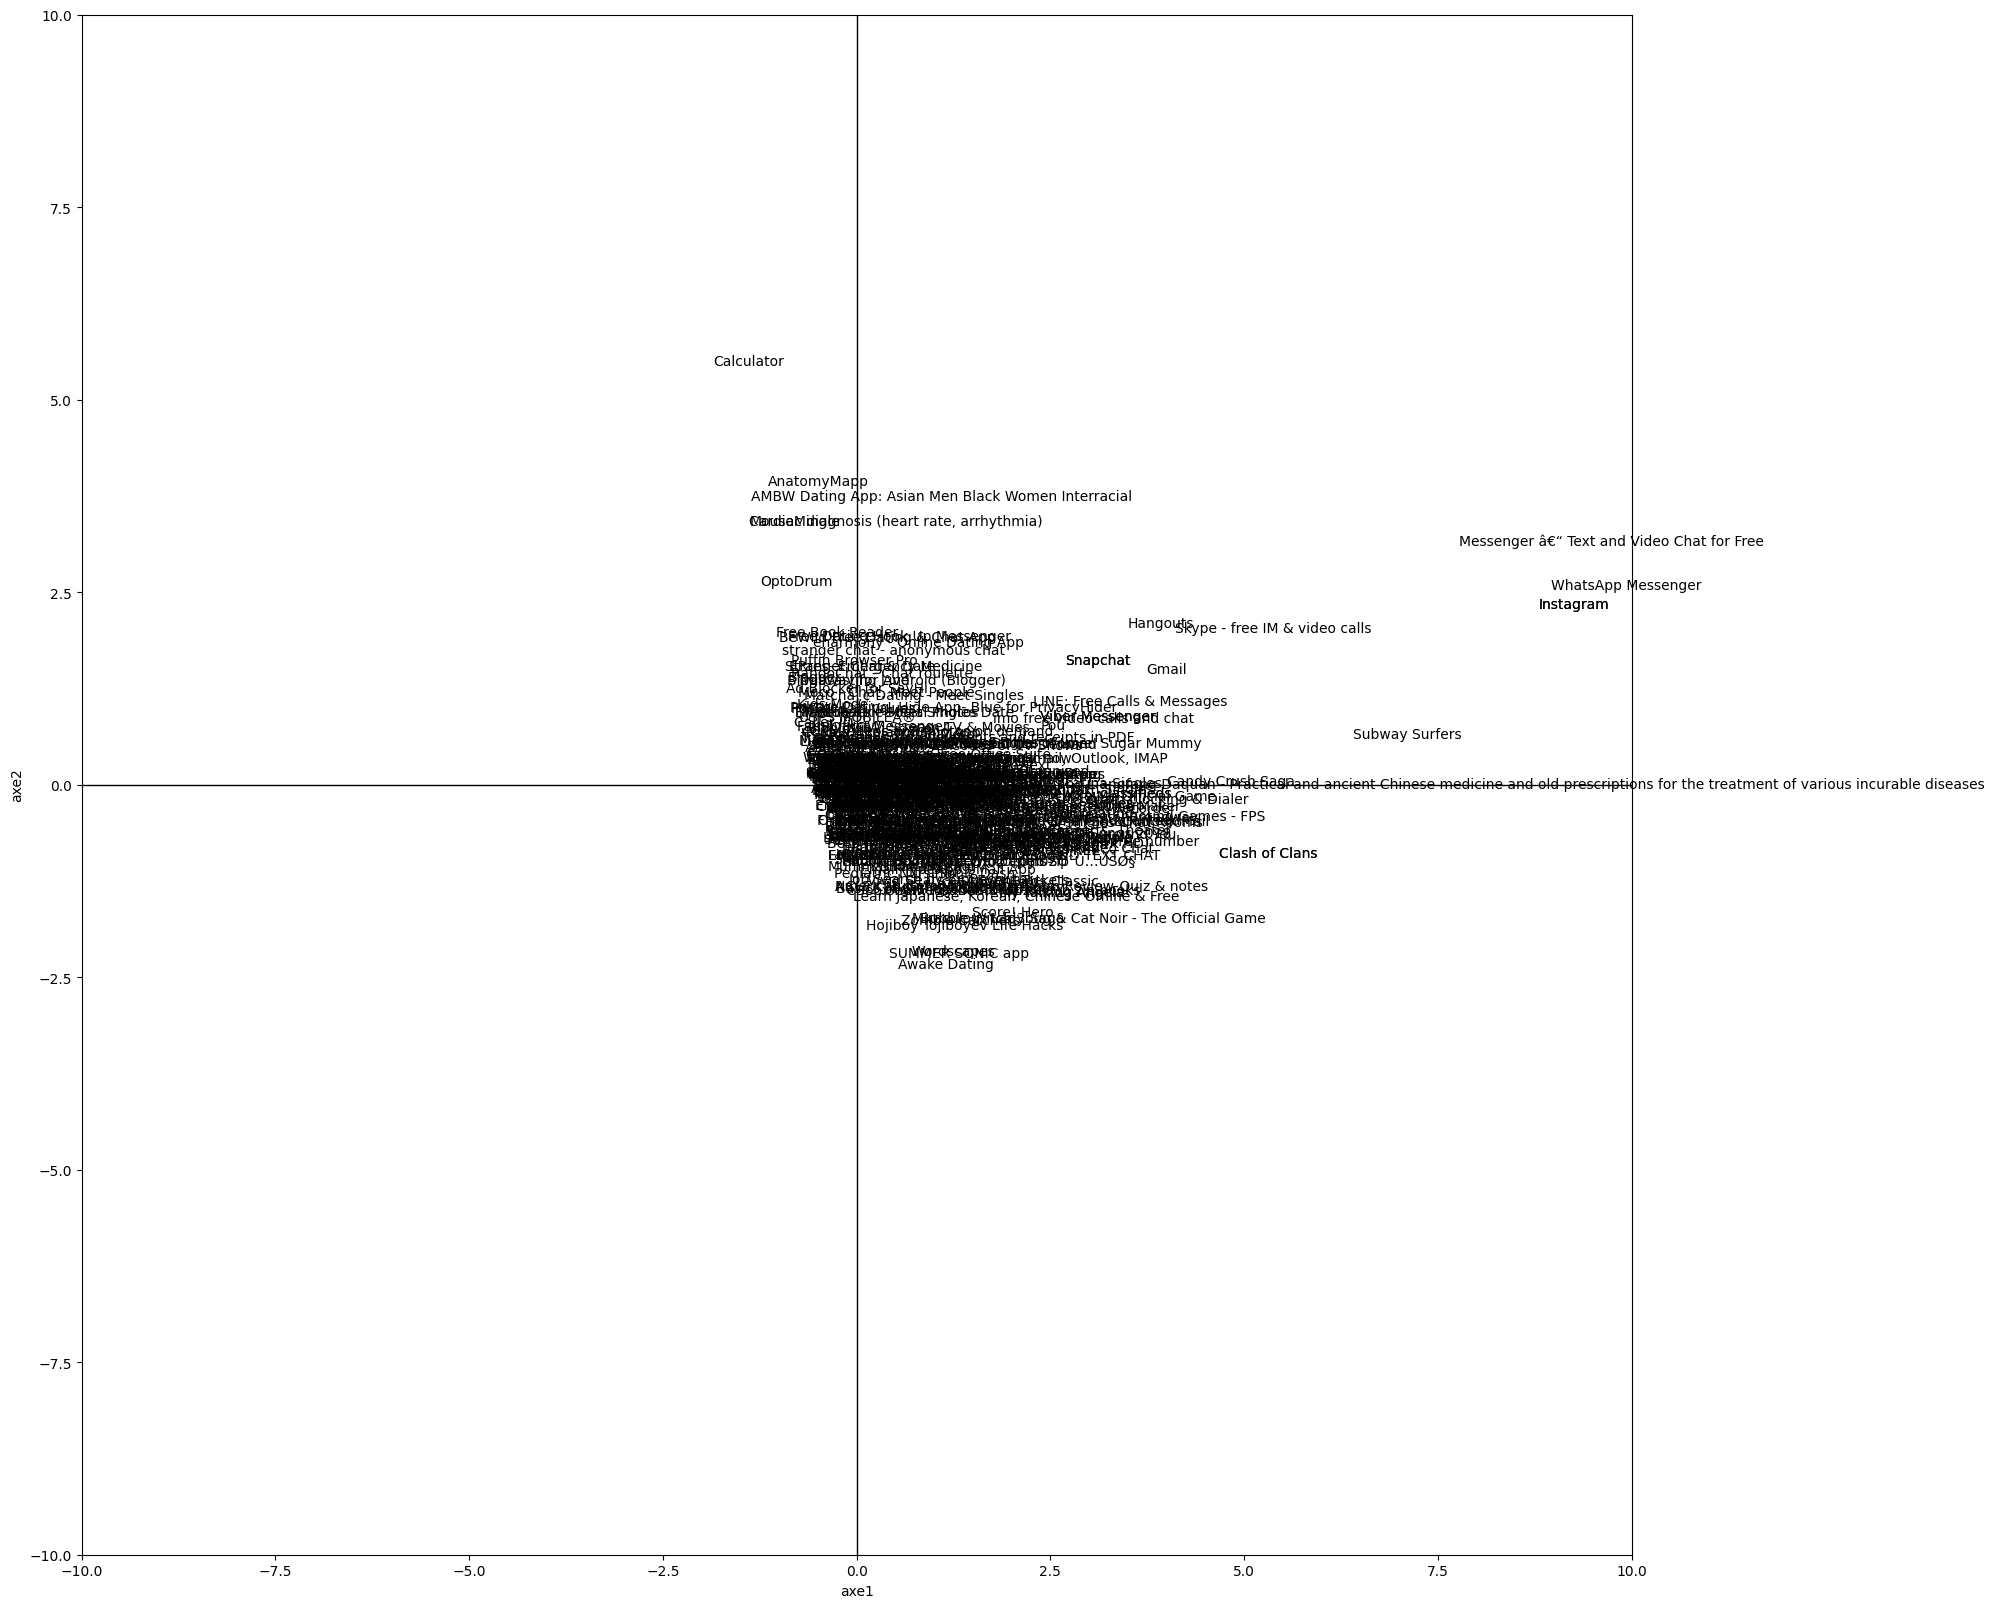

In [ ]:
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
for i in range(n):
 plt.annotate(df_copy.index[i],(coord[i,0],coord[i,1]))
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)
plt.ylabel("axe2")
plt.xlabel("axe1")
plt.show()

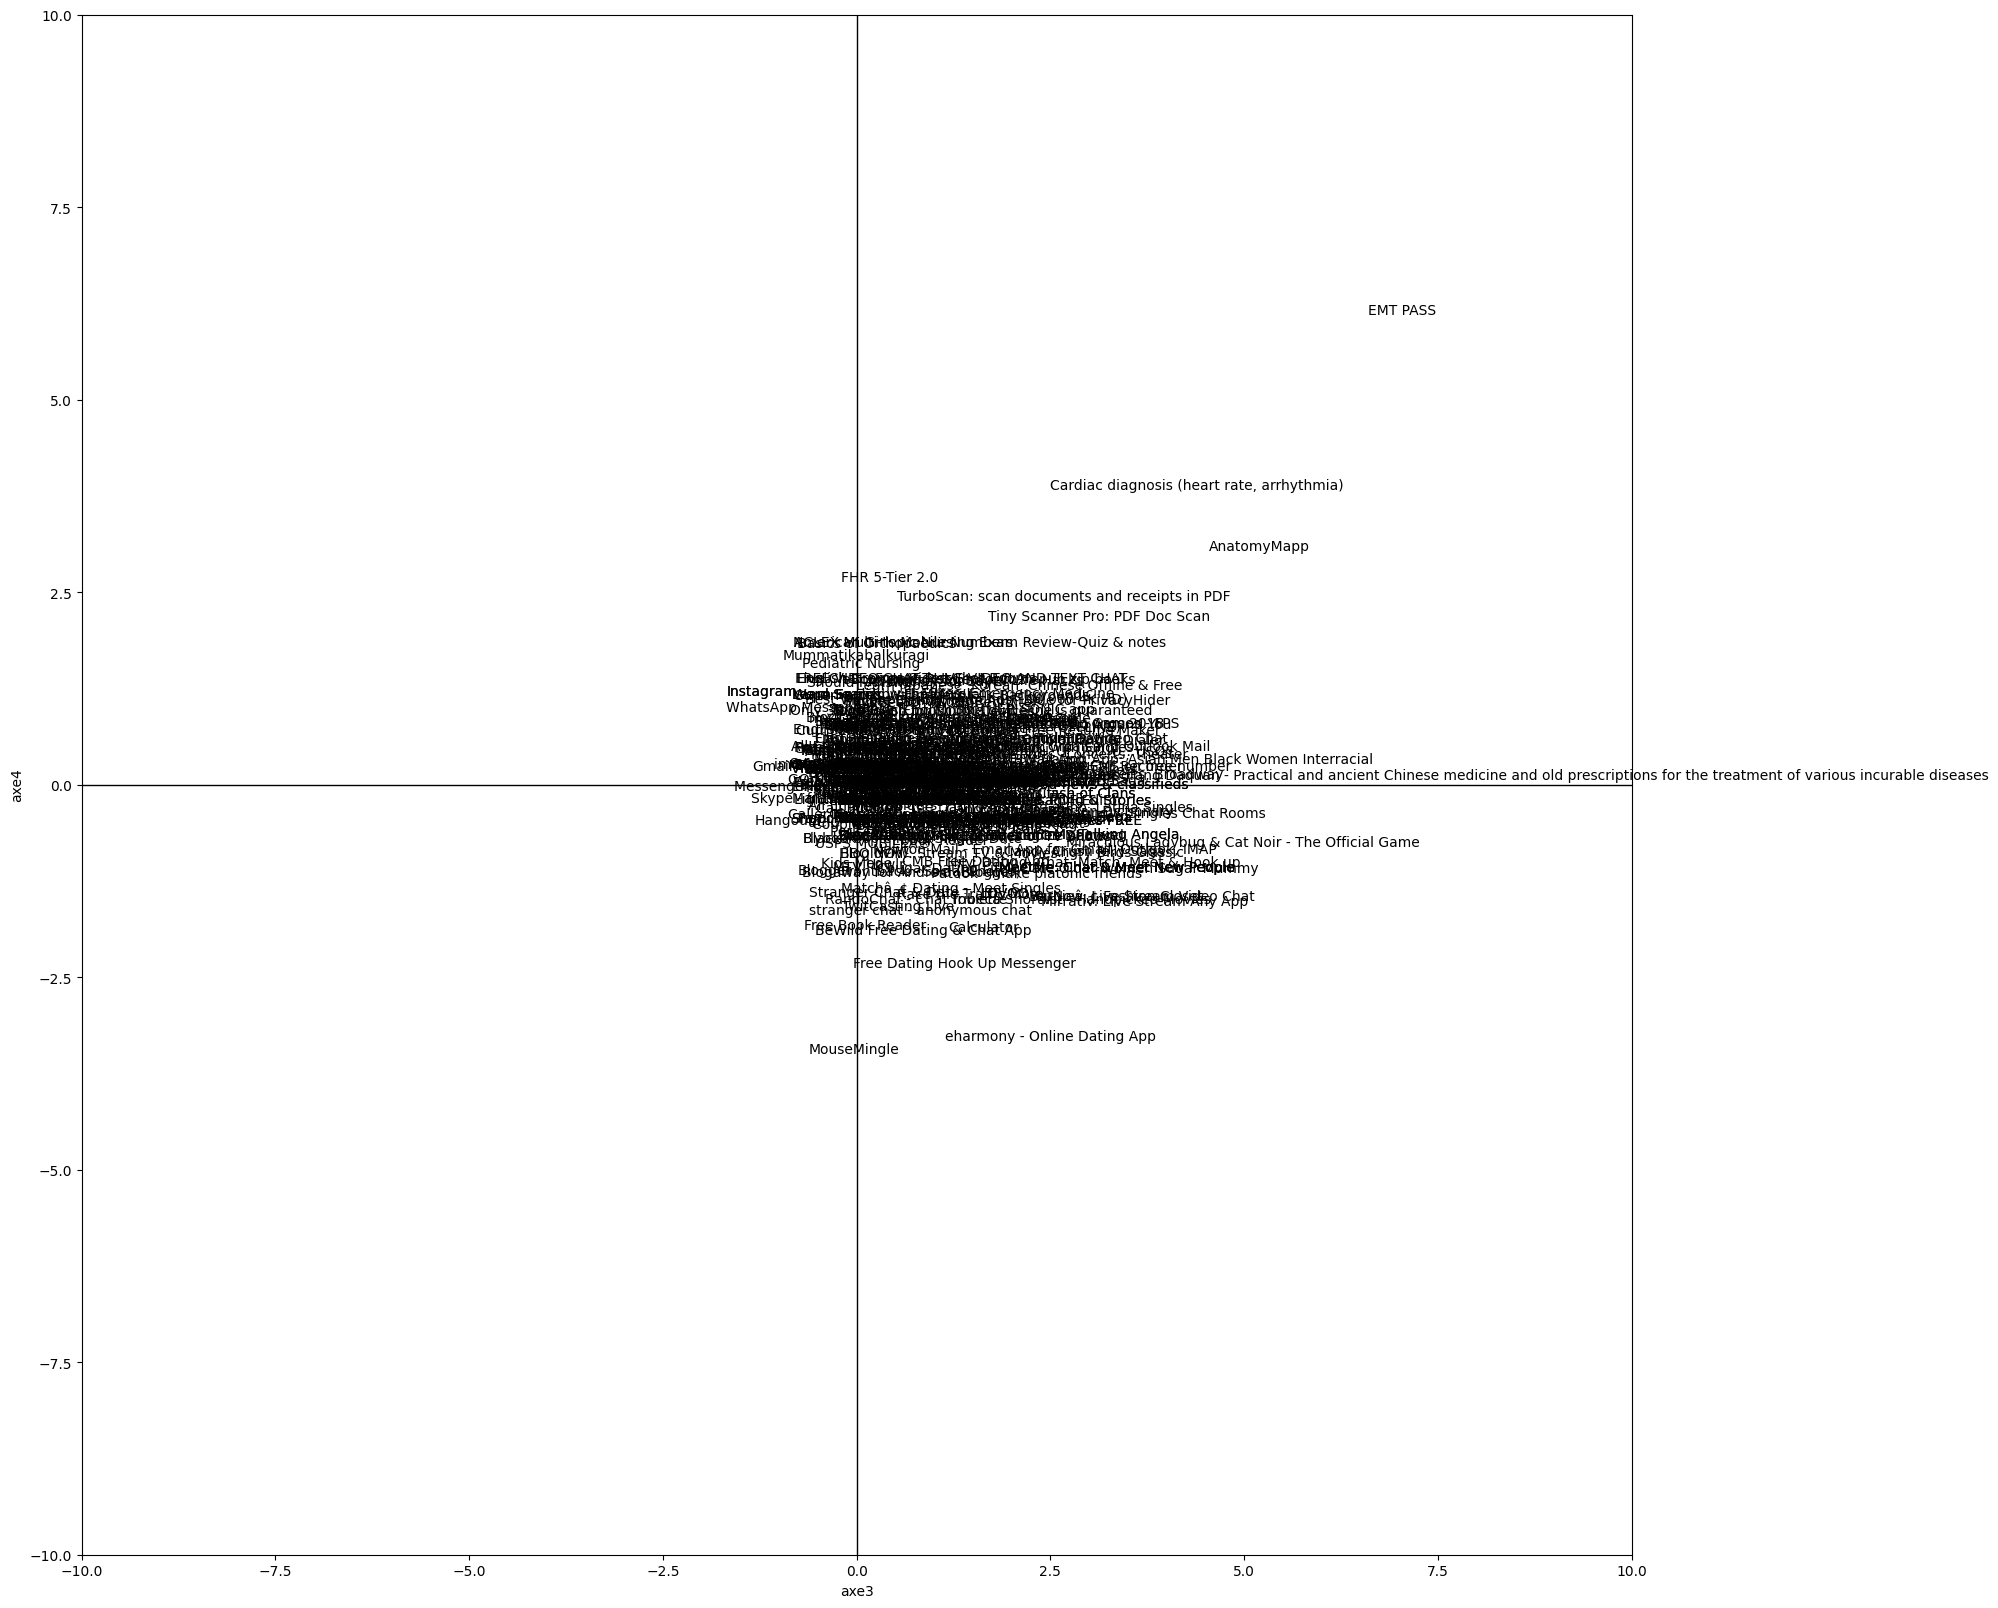

In [ ]:
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-10,10)
axes.set_ylim(-10,10)
for i in range(n):
 plt.annotate(df_copy.index[i],(coord[i,2],coord[i,3]))
plt.plot([-10,10],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-10,10],color='black',linestyle='-',linewidth=1)
plt.ylabel("axe4")
plt.xlabel("axe3")
plt.show()

**l'acp** se fait seulement sur les variables quantitative (supprimer les variables qualitatives

il faut prendre lambda qui a des pourcentages superieurs a 70%

In [ ]:
sqrt_eigval = np.sqrt(valprop)
corvar1=acp.components_[0,:] * sqrt_eigval[0]
print(corvar1)
corvar2=acp.components_[1,:] * sqrt_eigval[1]
print(corvar2)
corvar3=acp.components_[2,:] * sqrt_eigval[2]
print(corvar3)
corvar4=acp.components_[3,:] * sqrt_eigval[3]
print(corvar4)

[ 0.20481546  0.91264331  0.3757481   0.87763095 -0.19246295]
[-0.72682763  0.18805181 -0.38169175  0.28190984  0.65857634]
[-0.02787733 -0.04082418  0.78626629 -0.17545892  0.51169467]
[ 0.65427202  0.06230661 -0.30412089  0.02607208  0.51686596]


In [ ]:
Ctrvar1=(corvar1**2)/(valprop[0])*100
Ctrvar2=(corvar2**2)/(valprop[1])*100
Ctrvar3=(corvar3**2)/(valprop[2])*100
Ctrvar4=(corvar4**2)/(valprop[3])*100

In [ ]:
Cosvar1=(corvar1**2)*100
Cosvar2=(corvar2**2)*100
Cosvar3=(corvar3**2)*100
Cosvar4=(corvar4**2)*100

In [ ]:
print(pd.DataFrame({'ID':df_copy.columns,'corvar1':corvar1,'corvar2':corvar2,'corvar3':corvar3,'corvar4':corvar4,'Ctrvar1':Ctrvar1,'Ctrvar2':Ctrvar2,'Ctrvar3':Ctrvar3,'Ctrvar4':Ctrvar4,'Cosvar1':Cosvar1,'Cosvar2':Cosvar2,'Cosvar3':Cosvar3,'Cosvar4':Cosvar4}))

          ID   corvar1   corvar2   corvar3   corvar4    Ctrvar1    Ctrvar2  \
0     Rating  0.204815 -0.726828 -0.027877  0.654272   2.300699  43.212022   
1    Reviews  0.912643  0.188052 -0.040824  0.062307  45.681086   2.892656   
2    Size(M)  0.375748 -0.381692  0.786266 -0.304121   7.743332  11.917010   
3   Installs  0.877631  0.281910 -0.175459  0.026072  42.243328   6.500731   
4  Price ($) -0.192463  0.658576  0.511695  0.516866   2.031555  35.477580   

     Ctrvar3    Ctrvar4    Cosvar1    Cosvar2    Cosvar3    Cosvar4  
0   0.085094  54.030808   4.194937  52.827840   0.077715  42.807187  
1   0.182487   0.489997  83.291782   3.536348   0.166661   0.388211  
2  67.692010  11.673935  14.118664  14.568860  61.821467   9.248952  
3   3.370924   0.085798  77.023608   7.947316   3.078583   0.067975  
4  28.669484  33.719462   3.704199  43.372280  26.183143  26.715042  


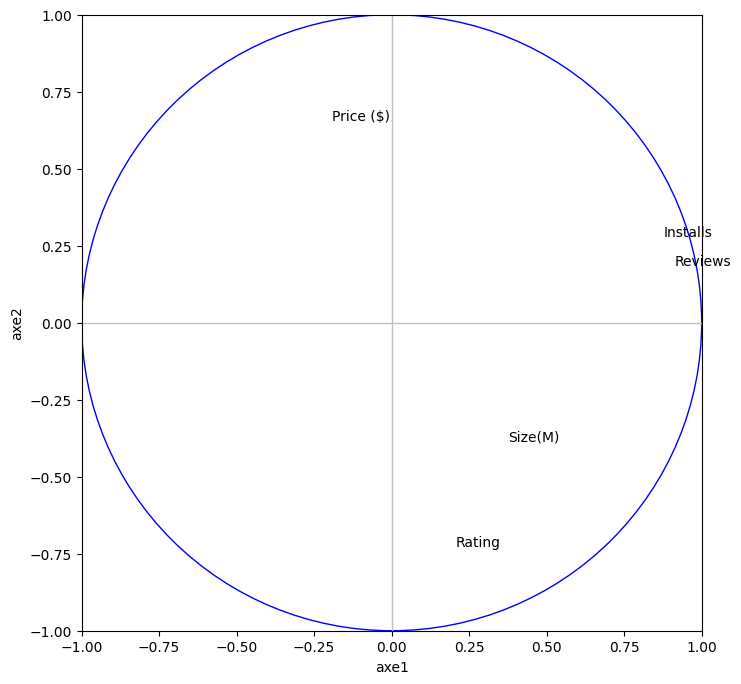

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(df_copy.columns[j],(corvar1[j],corvar2[j]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.ylabel("axe2")
plt.xlabel("axe1")
plt.show()


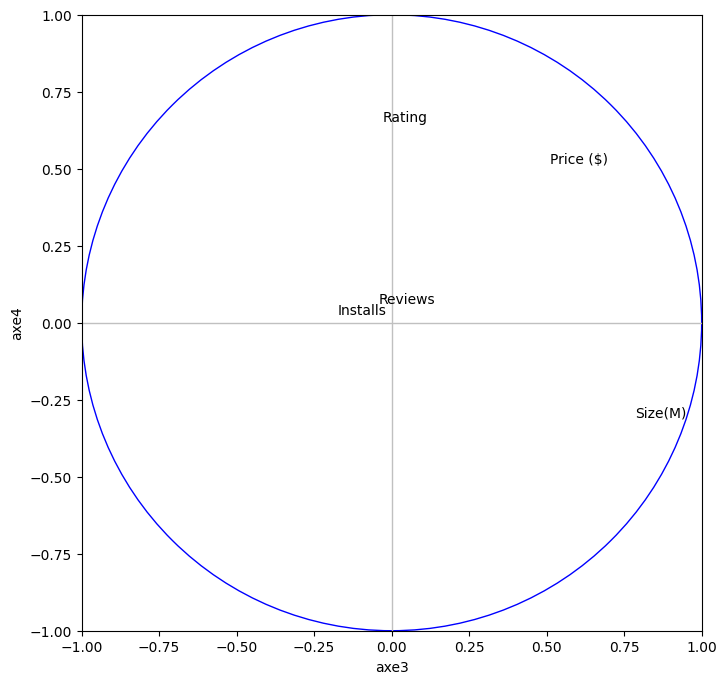

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(df_copy.columns[j],(corvar3[j],corvar4[j]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.ylabel("axe4")
plt.xlabel("axe3")
plt.show()


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=4)
pca.fit(df_copy)

PCA(n_components=4)

In [ ]:
indiv_coordinates = pca.transform(df_copy)
indiv_coord_first = indiv_coordinates[:,0]

In [ ]:
indiv_sorted = sorted(range(len(indiv_coord_first)), key=lambda k: indiv_coord_first[k], reverse=True)


In [ ]:
indiv_coordinates = pca.transform(df_copy)
indiv_coord_first = indiv_coordinates[:, 0]

indiv_sorted = sorted(range(len(indiv_coord_first)), key=lambda k: indiv_coord_first[k], reverse=True)

indiv_names = df.index


n = 10
print("Les", n, "individus qui ont le plus contribué au 1er axe factoriel sont :")
for i in range(n):
    print("Nom de l'individu :", indiv_names[indiv_sorted[i]])
    print("Valeurs dans chaque variable :")
    for j in range(len(df_copy.columns)):
        print(df_copy.iloc[indiv_sorted[i], j])
    print('\n')


Les 10 individus qui ont le plus contribué au 1er axe factoriel sont :
Nom de l'individu : WhatsApp Messenger
Valeurs dans chaque variable :
4.4
69119316
18.0
1000000000
0.0


Nom de l'individu : Instagram
Valeurs dans chaque variable :
4.5
66577446
18.0
1000000000
0.0


Nom de l'individu : Instagram
Valeurs dans chaque variable :
4.5
66577313
18.0
1000000000
0.0


Nom de l'individu : Messenger â€“ Text and Video Chat for Free
Valeurs dans chaque variable :
4.0
56642847
18.0
1000000000
0.0


Nom de l'individu : Subway Surfers
Valeurs dans chaque variable :
4.5
27723193
76.0
1000000000
0.0


Nom de l'individu : Skype - free IM & video calls
Valeurs dans chaque variable :
4.1
10484169
18.0
1000000000
0.0


Nom de l'individu : Gmail
Valeurs dans chaque variable :
4.3
4604483
18.0
1000000000
0.0


Nom de l'individu : Hangouts
Valeurs dans chaque variable :
4.0
3419513
18.0
1000000000
0.0


Nom de l'individu : Candy Crush Saga
Valeurs dans chaque variable :
4.4
22428456
74.0
500000000
0.0



In [ ]:

indiv_coordinates = pca.transform(df_copy)
indiv_coord_first = indiv_coordinates[:, 1]

indiv_sorted = sorted(range(len(indiv_coord_first)), key=lambda k: indiv_coord_first[k], reverse=True)

indiv_names = df.index

n = 10
print("Les", n, "individus qui ont le plus contribué au 1er axe factoriel sont :")
for i in range(n):
    print("Nom de l'individu :", indiv_names[indiv_sorted[i]])
    print("Valeurs dans chaque variable :")
    for j in range(len(df_copy.columns)):
        print(df_copy.iloc[indiv_sorted[i], j])
    print('\n')

Les 10 individus qui ont le plus contribué au 1er axe factoriel sont :
Nom de l'individu : Clash of Clans
Valeurs dans chaque variable :
4.6
44891723
98.0
100000000
0.0


Nom de l'individu : Clash of Clans
Valeurs dans chaque variable :
4.6
44891723
98.0
100000000
0.0


Nom de l'individu : WhatsApp Messenger
Valeurs dans chaque variable :
4.4
69119316
18.0
1000000000
0.0


Nom de l'individu : Instagram
Valeurs dans chaque variable :
4.5
66577446
18.0
1000000000
0.0


Nom de l'individu : Instagram
Valeurs dans chaque variable :
4.5
66577313
18.0
1000000000
0.0


Nom de l'individu : Messenger â€“ Text and Video Chat for Free
Valeurs dans chaque variable :
4.0
56642847
18.0
1000000000
0.0


Nom de l'individu : 8 Ball Pool
Valeurs dans chaque variable :
4.5
14198602
52.0
100000000
0.0


Nom de l'individu : 8 Ball Pool
Valeurs dans chaque variable :
4.5
14198297
52.0
100000000
0.0


Nom de l'individu : Minion Rush: Despicable Me Official Game
Valeurs dans chaque variable :
4.5
10216538
18.0

In [ ]:
indiv_coordinates = pca.transform(df_copy)
indiv_coord_first = indiv_coordinates[:, 2]

indiv_sorted = sorted(range(len(indiv_coord_first)), key=lambda k: indiv_coord_first[k], reverse=True)

indiv_names = df.index

n = 10
print("Les", n, "individus qui ont le plus contribué au 3er axe factoriel sont :")
for i in range(n):
    print("Nom de l'individu :", indiv_names[indiv_sorted[i]])
    print("Valeurs dans chaque variable :")
    for j in range(len(df_copy.columns)):
        print(df_copy.iloc[indiv_sorted[i], j])
    print('\n')


Les 10 individus qui ont le plus contribué au 3er axe factoriel sont :
Nom de l'individu : Miraculous Ladybug & Cat Noir - The Official Game
Valeurs dans chaque variable :
4.5
183846
99.0
10000000
0.0


Nom de l'individu : Angry Birds Classic
Valeurs dans chaque variable :
4.4
5566669
97.0
100000000
0.0


Nom de l'individu : Score! Hero
Valeurs dans chaque variable :
4.6
5418675
96.0
100000000
0.0


Nom de l'individu : My Talking Angela
Valeurs dans chaque variable :
4.5
9881829
99.0
100000000
0.0


Nom de l'individu : My Talking Angela
Valeurs dans chaque variable :
4.5
9881908
99.0
100000000
0.0


Nom de l'individu : Mirrativ: Live Stream Any App
Valeurs dans chaque variable :
4.1
17955
89.0
500
0.0


Nom de l'individu : Wordscapes
Valeurs dans chaque variable :
4.8
230710
87.0
10000000
0.0


Nom de l'individu : Barbieâ„¢ Fashion Closet
Valeurs dans chaque variable :
4.1
68057
85.0
10000000
0.0


Nom de l'individu : YouNow: Live Stream Video Chat
Valeurs dans chaque variable :
4.1
30

In [ ]:
indiv_coordinates = pca.transform(df_copy)
indiv_coord_first = indiv_coordinates[:, 3]

indiv_sorted = sorted(range(len(indiv_coord_first)), key=lambda k: indiv_coord_first[k], reverse=True)

indiv_names = df.index

n = 10
print("Les", n, "individus qui ont le plus contribué au 3er axe factoriel sont :")
for i in range(n):
    print("Nom de l'individu :", indiv_names[indiv_sorted[i]])
    print("Valeurs dans chaque variable :")
    for j in range(len(df_copy.columns)):
        print(df_copy.iloc[indiv_sorted[i], j])
    print('\n')


Les 10 individus qui ont le plus contribué au 3er axe factoriel sont :
Nom de l'individu : EMT PASS
Valeurs dans chaque variable :
3.4
51
2.4
1
29.99


Nom de l'individu : AnatomyMapp
Valeurs dans chaque variable :
4.1
80
48.0
5
14.99


Nom de l'individu : Cardiac diagnosis (heart rate, arrhythmia)
Valeurs dans chaque variable :
4.4
8
6.5
100
12.99


Nom de l'individu : AMBW Dating App: Asian Men Black Women Interracial
Valeurs dans chaque variable :
3.5
2
17.0
100
7.99


Nom de l'individu : Calculator
Valeurs dans chaque variable :
2.6
57
6.2
1
6.99


Nom de l'individu : OptoDrum
Valeurs dans chaque variable :
3.9
10
0.378
1
5.99


Nom de l'individu : Tiny Scanner Pro: PDF Doc Scan
Valeurs dans chaque variable :
4.8
10295
39.0
100
4.99


Nom de l'individu : ERres- Emergency Medicine
Valeurs dans chaque variable :
4.2
45
14.0
1
4.99


Nom de l'individu : TurboScan: scan documents and receipts in PDF
Valeurs dans chaque variable :
4.7
11442
6.8
100
4.99


Nom de l'individu : Puffin Brow

# ***Classification***



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(df_copy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
idk = np.argsort(kmeans.labels_)

In [ ]:
print(pd.DataFrame(df_copy.index[idk],kmeans.labels_[idk]))

                                                  App
0                      Badoo - Free Chat & Dating App
0                                   My Talking Angela
0                                    Farm Heroes Saga
0            Minion Rush: Despicable Me Official Game
0                      Badoo - Free Chat & Dating App
..                                                ...
3                                   Clover Dating App
3   Chispa, the Dating App for Latino, Latina Singles
3   Free Dating App & Flirt Chat - Match with Singles
3                         Blendr - Chat, Flirt & Meet
3   SeatGeek â€“ Tickets to Sports, Concerts, Broa...

[326 rows x 1 columns]


In [ ]:
A=kmeans.transform(df_copy)
print(A)

[[8.21225484e+07 1.00072641e+09 5.00172159e+08 3.23470210e+06]
 [8.21234183e+07 1.00072710e+09 5.00172759e+08 3.23539252e+06]
 [8.21234647e+07 1.00072715e+09 5.00172808e+08 3.23544024e+06]
 ...
 [7.20903655e+07 9.90702087e+08 4.90154261e+08 6.80577308e+06]
 [3.22165460e+07 9.50723349e+08 4.50162238e+08 4.67763860e+07]
 [1.80783493e+07 9.00655723e+08 4.00109661e+08 9.68359921e+07]]


In [ ]:
import sklearn

In [ ]:

from sklearn.decomposition import PCA

In [ ]:
acp= PCA(n_components =2).fit_transform(df_copy)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
sse=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Rating','Reviews', 'Size(M)', 'Installs' ,'Price ($)']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

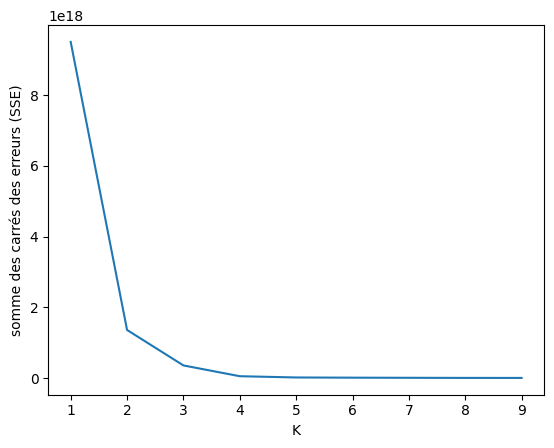

In [ ]:
plt.xlabel('K')
plt.ylabel('somme des carrés des erreurs (SSE)')
plt.plot(k_rng,sse)

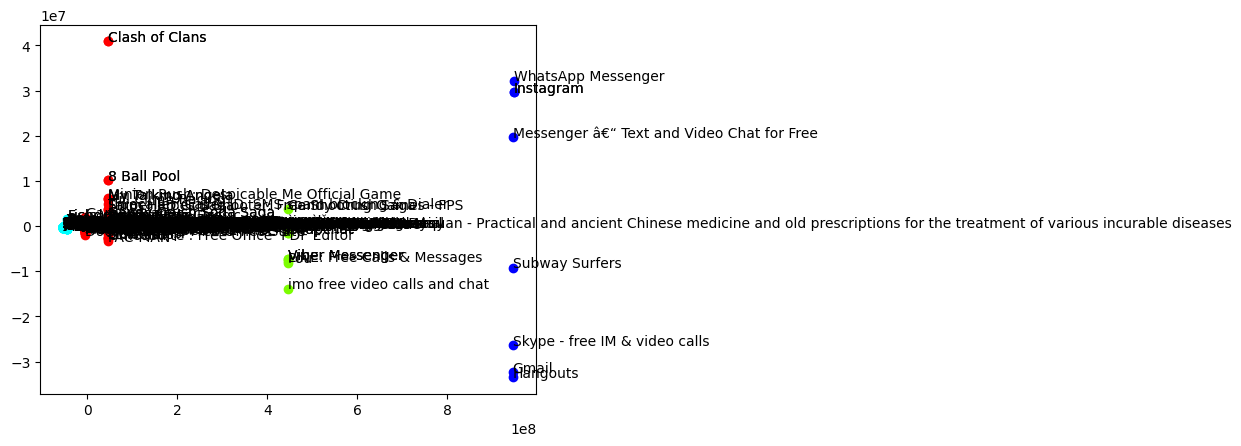

In [ ]:
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]) :
   plt.scatter(acp[kmeans.labels_==k,0], acp[kmeans.labels_==k,1],c=couleur)
n = df_copy.shape[0]
for i in range(n) :
   plt.annotate(df_copy.index[i],(acp[i,0], acp[i,1]))
plt.show()

In [ ]:
Y= pd.DataFrame({'index':df_copy.index[idk],'Rating':df_copy.Rating,'Reviews':df_copy.Reviews,'Size(M)':df_copy['Size(M)'],'Installs':df_copy.Installs,'Price ($)':df_copy['Price ($)'],'classe':kmeans.labels_[idk] })
print(Y)

                                                                                     index  \
App                                                                                          
Superheroes Wallpapers | 4K Backgrounds                     Badoo - Free Chat & Dating App   
Mcqueen Coloring pages                                                   My Talking Angela   
HD Mickey Minnie Wallpapers                                               Farm Heroes Saga   
NOOK App for NOOK Devices                         Minion Rush: Despicable Me Official Game   
Anonymous caller detection                                  Badoo - Free Chat & Dating App   
...                                                                                    ...   
MeetMe: Chat & Meet New People                                           Clover Dating App   
Tagged - Meet, Chat & Dating             Chispa, the Dating App for Latino, Latina Singles   
LOVOO                                    Free Dating App & F

In [ ]:
esp =Y.groupby('classe')
print(esp[['Rating']].describe())
print(esp[['Reviews']].describe())
print(esp[['Size(M)']].describe())
print(esp[['Installs']].describe())
print(esp[['Price ($)']].describe())


       Rating                                               
        count      mean       std  min    25%  50%  75%  max
classe                                                      
0        61.0  4.365574  0.271959  3.4  4.200  4.4  4.5  5.0
1         8.0  4.300000  0.177281  4.0  4.175  4.4  4.4  4.5
2         8.0  4.325000  0.175255  4.0  4.275  4.3  4.5  4.5
3       249.0  4.277510  0.335615  2.6  4.100  4.3  4.5  5.0
       Reviews                                                           \
         count          mean           std      min       25%       50%   
classe                                                                    
0         61.0  2.340954e+06  1.138970e+07      2.0   4458.00   19080.0   
1          8.0  2.159058e+05  2.360290e+05  15287.0  32275.75   77066.5   
2          8.0  2.154574e+06  2.997703e+06   9498.0  70038.50  255478.5   
3        249.0  2.366001e+06  7.838129e+06      0.0   2067.00   79129.0   

                                
              

In [ ]:
from scipy.cluster.hierarchy import dendrogram , linkage, fcluster

[[2.65000000e+02 3.13000000e+02 0.00000000e+00 2.00000000e+00]
 [2.96000000e+02 3.09000000e+02 0.00000000e+00 2.00000000e+00]
 [3.21000000e+02 3.27000000e+02 0.00000000e+00 3.00000000e+00]
 ...
 [6.45000000e+02 6.47000000e+02 7.80934315e+08 3.10000000e+02]
 [6.40000000e+02 6.46000000e+02 1.41597948e+09 1.60000000e+01]
 [6.48000000e+02 6.49000000e+02 4.03619184e+09 3.26000000e+02]]


<function matplotlib.pyplot.show(close=None, block=None)>

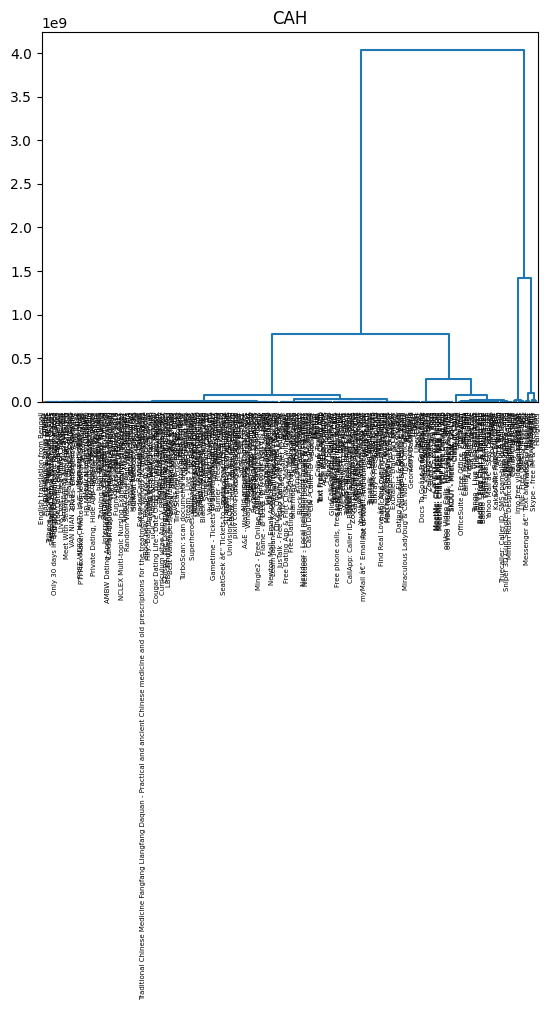

In [ ]:
Z = linkage(df_copy,method='ward',metric='euclidean')
print(Z)
plt.title("CAH")
dendrogram(Z,labels=df_copy.index,color_threshold =300)
plt.show
